### Model Evaluation: Why Recall Matters

In fraud detection, **recall is more important than accuracy or precision**. Accuracy can be misleading due to class imbalance — predicting all transactions as "not fraud" would still yield 99.8% accuracy.

**Recall (fraud class)** tells us how many actual fraud cases were correctly detected. A high recall ensures fewer fraudulent transactions slip through.

In our model:
- Random Forest achieved ~85% recall
- Logistic Regression achieved ~X% recall (compare after running)

This justifies the choice of Random Forest as the better model for this use case.


### Feature Importance Insights

Random Forest identified the most important features as **V14, V17, V12, V10, and V16**.

Although we don’t know what these anonymized features represent, their strong influence suggests:
- V14 and V17 may capture fraud patterns (e.g., transaction behavior anomalies)
- These features should be monitored more closely in real-world systems

This shows the model can prioritize signals from relevant dimensions even without explicit feature names.


In [1]:
!pip install -q gdown

# Download dataset from Google Drive if it doesn't exist
import os
import gdown

file_path = "creditcard.csv"
if not os.path.exists(file_path):
    print("Downloading dataset from Google Drive...")
    gdown.download(
        "https://drive.google.com/uc?id=1ct1I4a3KKiarH590dWTRzeZ6DmCArK8I",
        file_path,
        quiet=False
    )
else:
    print("Dataset already exists.")


Dataset already exists.


In [2]:
# Import core data handling and plotting libraries

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

import seaborn as sns

# Import tools for splitting data and balancing with SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



In [3]:
# Load the dataset from the CSV file into a pandas DataFrame

df = pd.read_csv("creditcard.csv")

# Show the first 5 rows of the dataset to inspect structure and values

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


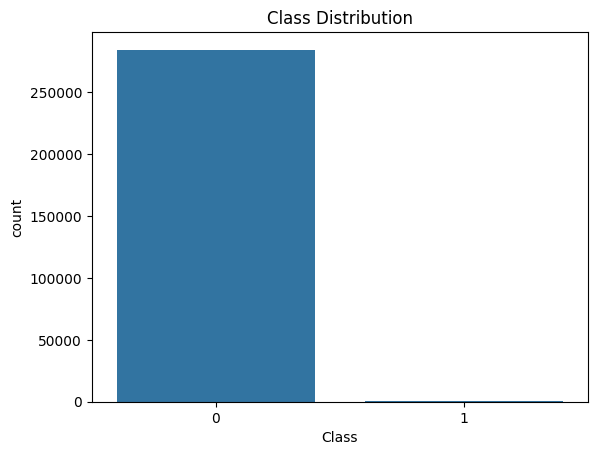

In [4]:
# Print how many fraud (1) vs. non-fraud (0) transactions exist

print(df['Class'].value_counts())

# Plot a bar chart to visualize class imbalance in the dataset
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()


In [5]:
# Separate features (X) and target labels (y)
X = df.drop('Class', axis=1)  # All columns except 'Class'
y = df['Class']               # Only the 'Class' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Initialize SMOTE to balance the minority class (fraud = 1)
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data to prevent data leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class counts before and after applying SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [7]:
# Import the Random Forest model from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest with 20 trees
model = RandomForestClassifier(n_estimators=20, random_state=42)

# Train the model on the balanced (SMOTE) training data
model.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier(n_estimators=20, random_state=42)

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.91      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\alenj\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


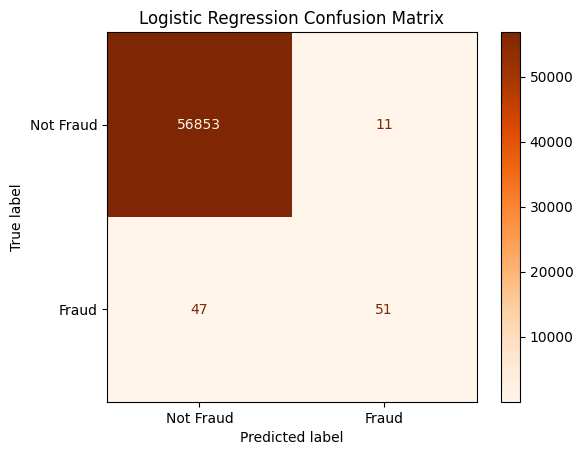

In [11]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(
    lr_model,
    X_test,
    y_test,
    display_labels=["Not Fraud", "Fraud"],
    cmap='Oranges'
)
plt.title("Logistic Regression Confusion Matrix")
plt.grid(False)
plt.show()



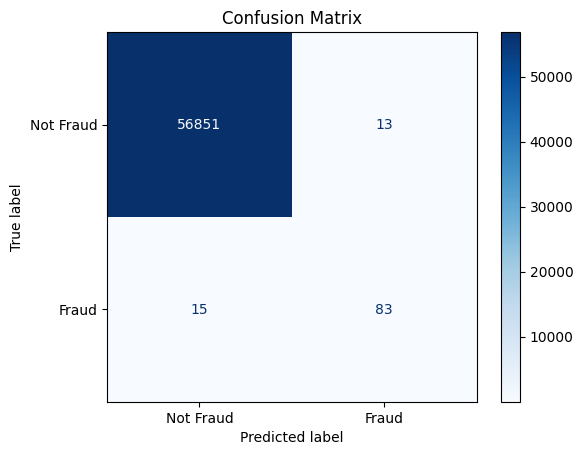

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=["Not Fraud", "Fraud"],
    cmap='Blues'
)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


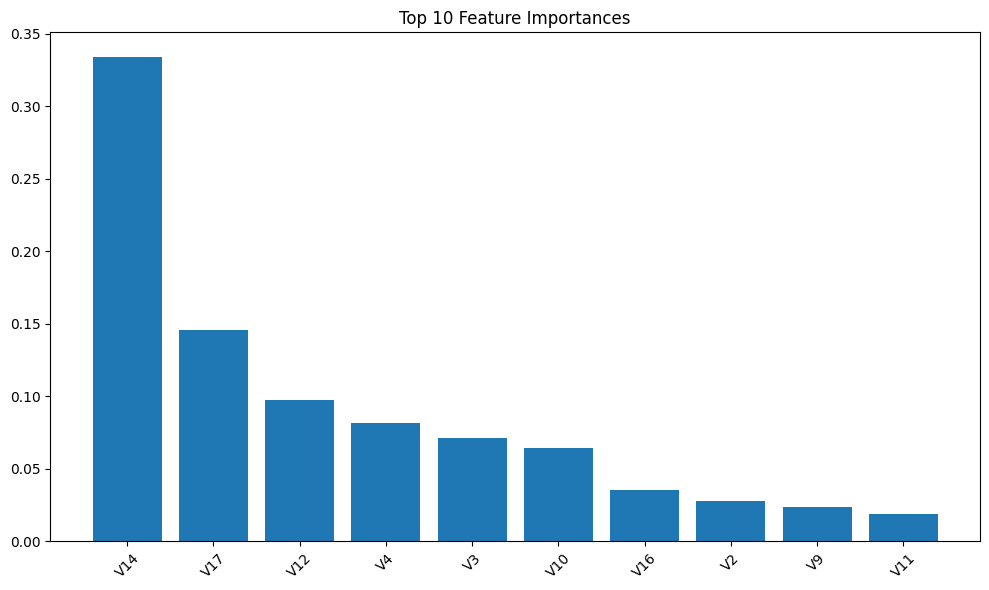

In [10]:
# Plot feature importances to understand which columns affect predictions the most
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=45)
plt.tight_layout()
plt.show()
